In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import spacy
import joblib

In [2]:
Final_Data = pd.read_csv('/Users/igorhufnagel/Desktop/Ironhack/LABS/Final Project/Datasets_Cleaned/Undersampled_Data.csv')

In [4]:
Final_Data

,Comment,Label,Phrase
0,"['one', 'way', 'anoth', 'end', 'weeki', 'strug...",Suicide,one way anoth end weeki struggl almost constan...
1,"['read', 'rant', 'dwi', 'like', 'way', 'look',...",Suicide,read rant dwi like way look life intellig prov...
2,"['home', 'park', 'fun', 'full', 'mud', 'wear',...",General,home park fun full mud wear white park ju sayi...
3,"['littlele', 'cute']",General,littlele cute
4,"['fuck', 'lifeim', 'yr', 'old', 'im', 'current...",Suicide,fuck lifeim yr old im current third year colle...
...,...,...,...
246018,['fun'],Sexual,fun
246019,"['lil', 'chri', 'today']",General,lil chri today
246020,"['get', 'better', 'one', 'day', 'aye', 'sure',...",Suicide,get better one day aye sure heard year told mo...
246021,"['help', 'plea', 'tri', 'best', 'start', 'wake...",Suicide,help plea tri best start wake earli morn jog g...


In [5]:
nlp = spacy.load('en_core_web_lg')

Final_Data = Final_Data.sample(n=116037)
Final_Data['Phrase'] = Final_Data['Phrase'].astype(str)
Final_Data['Vector'] = [nlp(x).vector for x in Final_Data['Phrase']]

In [6]:
category_mapping = {
    'General': 0,
    'Suicide': 1,
    'Sexual': 2,
    'Hate': 3,
    'Bullying': 4
}

Final_Data['Category'] = Final_Data['Label'].map(category_mapping)

In [7]:
Final_Data

,Comment,Label,Phrase,Vector,Category
105206,"['whatabout', 'ken', 'sorri', 'hear', 'ken', '...",General,whatabout ken sorri hear ken hug,"[0.3141067, 0.16308665, -0.20899498, 0.4538, -...",0
40769,"['scubadivalaura', 'greet', 'nice', 'collect',...",General,scubadivalaura greet nice collect quot,"[-0.38213998, -0.29858398, -0.46698397, -0.306...",0
57031,"['sometim', 'feel', 'like', 'vampir', 'drink',...",General,sometim feel like vampir drink blood work bett...,"[0.08448498, 0.020822978, -2.628938, -0.785692...",0
6881,"['officialwrc', 'vid', 'player', 'workin', 'we...",General,officialwrc vid player workin well,"[0.33403, 0.68972397, -0.39421, -0.08931999, 1...",0
106407,"['life', 'mundan', 'done', 'think', 'convinc',...",Suicide,life mundan done think convinc set life built ...,"[0.5950903, 1.7684193, -2.329716, -0.72897595,...",1
...,...,...,...,...,...
53448,"['cbake', 'mopemiph', 'e', 'actual', 'start', ...",General,cbake mopemiph e actual start tuesday friend c...,"[0.71442086, 1.5537763, 0.36480185, 0.7377482,...",0
155825,"['think', 'kill', 'formal', 'sick', 'life', 'a...",Suicide,think kill formal sick life anyth right go for...,"[-1.1709216, 0.8735755, -2.2951999, -0.3948830...",1
63461,"['well', 'quot', 'happi', 'hour', 'quot', 'nev...",General,well quot happi hour quot never came instead w...,"[-0.63908315, 1.25736, -2.1665354, -0.98636997...",0
155966,"['crc', 'show', 'last', 'night', 'heard', 'rai...",General,crc show last night heard rain like mf,"[-0.3681574, -0.34314287, -1.5207597, 0.318997...",0


In [8]:
X = np.array(Final_Data['Vector'].tolist())
y = Final_Data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X, X_test, y, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=100)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [10]:
y_pred = svm_model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9202412868632708
Precision: 0.9197568687284737
Recall: 0.9202412868632708
F1-score: 0.914743705577594


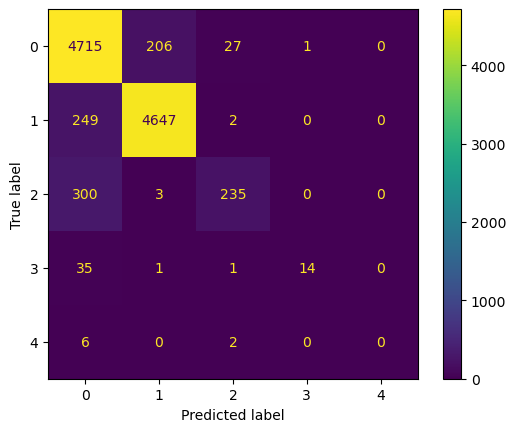

In [12]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [16]:
from sklearn.svm import SVC

# Instantiate an SVC model
svc_model = SVC()

# Fit the SVC model with the training data
svc_model.fit(X_train, y_train)

# Classify the user input phrase using the trained SVC model
predicted_label = svc_model.predict(phrase_vector)

# Present the classification result to the user
print(f"The predicted label for the input phrase is: {predicted_label}")

The predicted label for the input phrase is: [0]


In [17]:
import nltk
from nltk.corpus import stopwords

# Define the stopwords for your language (e.g., English)
stopwords = set(stopwords.words('english'))

# Preprocess the user input phrase
tokens = [token for token in tokens if token.lower() not in stopwords]

In [15]:
# Get user input phrase for classification
user_input = input("Enter a comment: ")

# Preprocess the user input phrase
# For example, you can tokenize, remove stop words, and vectorize the phrase
# using the same preprocessing steps as your training data

# Apply the same preprocessing steps to the user input as you did for training data
# For example:
# 1. Tokenize the phrase
tokens = [token.text for token in nlp(user_input)]
# 2. Remove stop words
tokens = [token for token in tokens if token not in stopwords]
# 3. Vectorize the phrase
phrase_vector = nlp(user_input).vector

# Reshape the vector to match the input shape expected by the SVC model
phrase_vector = phrase_vector.reshape(1, -1)

# Classify the user input phrase using the trained SVC model
predicted_label = svc_model.predict(phrase_vector)

# Present the classification result to the user
print("Predicted Label:", predicted_label)

Enter a comment: I hate you
Predicted Label: [0]


In [18]:
# Collect misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_samples = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

# Perform error analysis
for i in range(len(misclassified_samples)):
    # Get the text of the misclassified sample
    sample_text = Final_Data.iloc[misclassified_indices[i]]['Phrase']
    
    # Get the true and predicted labels
    true_label = true_labels[i]
    predicted_label = predicted_labels[i]
    
    # Print the misclassified sample and its labels
    print(f"Sample text: {sample_text}")
    print(f"True label: {true_label}")
    print(f"Predicted label: {predicted_label}")
    print()

Sample text: worth anymorefin first real friend year fall life incred great somebodi felt comfort tell anyth everyth without judgment convinc throw away like everyon el life knew noth even remot good could last guess know tri worth live much pain go spend time tie thing life join marin live instead
True label: 2
Predicted label: 0

Sample text: unsur hi realli sure aim post struggl depress adult adolesc life get peopl say say like think good thing could happen futur etc time everi moment feel like constant emot pain anxieti head constant strong inhibit abil function correctli alot time peopl also say think friend famili reaction etc idk thought overrid terribl feel time sorri break rule thank read wonder anyon mayb new idea basic thing could mayb push right direct convinc away suicid thought
True label: 0
Predicted label: 1

Sample text: suicid want die hand famili worri went wrong almost got ran cross street earlier wish actual hit put end miseri
True label: 0
Predicted label: 1

Samp

Sample text: wigginscc time stop slow wayyy
True label: 1
Predicted label: 0

Sample text: almost today got plastic bag put head slip away thing got fuzzi took bag cri minut friend adjac room know appoint therapist know make exhaust emot physic mental cope anymor pull
True label: 0
Predicted label: 2

Sample text: grandfath mother side famili heart attack current doctor make effort reviv mother devast help hope titl enough depth want help mother cope without usual stuff like rule ineffect thank read advanc help
True label: 2
Predicted label: 0

Sample text: play detect sim crush new guy case mwah haha fun
True label: 0
Predicted label: 1

Sample text: piggysmal today amaz day say
True label: 2
Predicted label: 0

Sample text: consid new award mean could get gta v seen post wast money award could gta v still enough anoth gta v would still left peopl buy goddamn meme much meme
True label: 1
Predicted label: 0

Sample text: jackalltimelow twist fella
True label: 0
Predicted label: 1

Samp